# Reguarization

## 02 Overfitting and Occam's razor

In the last subject, we discussed **model complexity** and the ability to **generalize** from data. We saw two cases.

1. **Underfitting** - the model is too simple and fails to fit the data/signal
2. **Overfitting** - the model is too complex and fits the noise in addition to the signal

In this subject, we will see how to control overfitting using **regularization**. But first, let’s talk about **Occam’s razor** which is the basic idea behind it, but also an interesting principle in general.

## Occam’s razor

Occam’s razor is a principle which states that if multiple solutions are available, the simplest one is better than the others. The idea is that it’s easy to build overly complicated solutions with **ad-hoc rules** that don’t generalize well.

In the context of machine learning, the principle says that we should prefer simpler models unless we are sure that the complex ones are necessary.

We often say that generalization is the central goal of machine learning. Occam’s razor is one of the important principles to achieve this. You can take a look at section 3 and 4 of the paper “A few useful things to know about machine learning” by Pedro Domingos to learn more about the intuition behind generalization. [Here is the link](https://scholar.google.ch/scholar?cluster=4404716649035182981&hl=en&as_sdt=0,5) to the google scholar page.

## Increasing the amount of data
The amount of data also plays a role in the **under-/overfitting balance**. Let’s do a quick experiment. In this image, we show two polynomial regressions of degree 9 fitted to 10 and 80 data points from the same source of data.

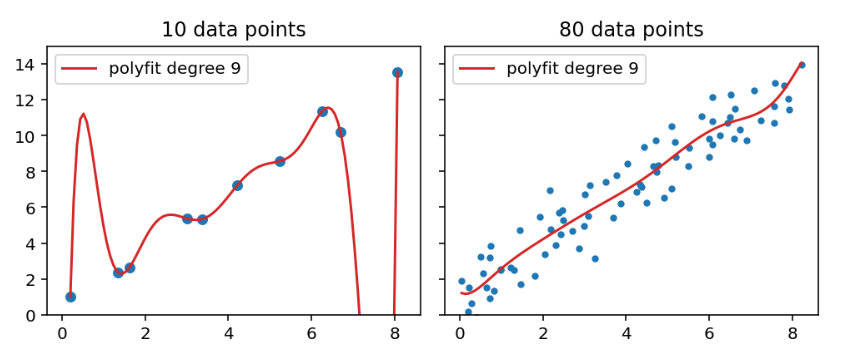

In the first case, the model is strongly overfitting. In fact, the polynomial passes through each data point. The problem is lessened in the second case.

### Summary
In this unit, we learned about Occam’s razor which is an important principle in machine learning. In the next unit, we will learn about regularization which is an efficient way to reduce overfitting.

## 03 Regularization
In practice, we use **regularization** to fight overfitting and to improve the generalizability of a model. By regularization we opt for models that are less complex, because more complex model do not generalize well on the unseen data even though they may provide a good fit on the training data. In this unit, we will see the basic idea behind it. We will then implement regularization with Scikit-learn in the next unit.

### L2 regularization

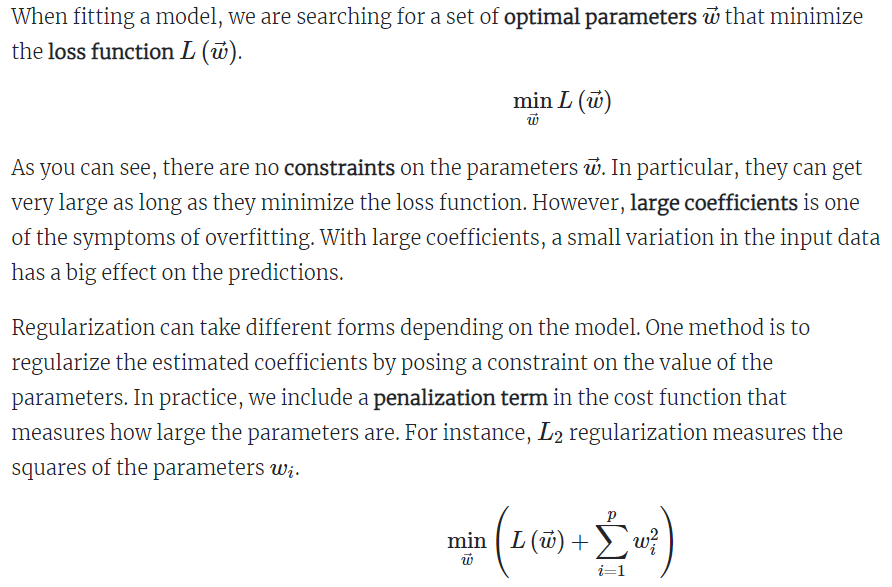

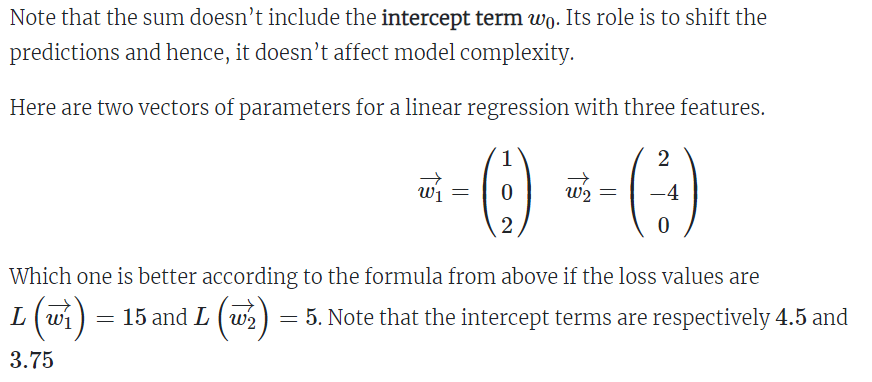

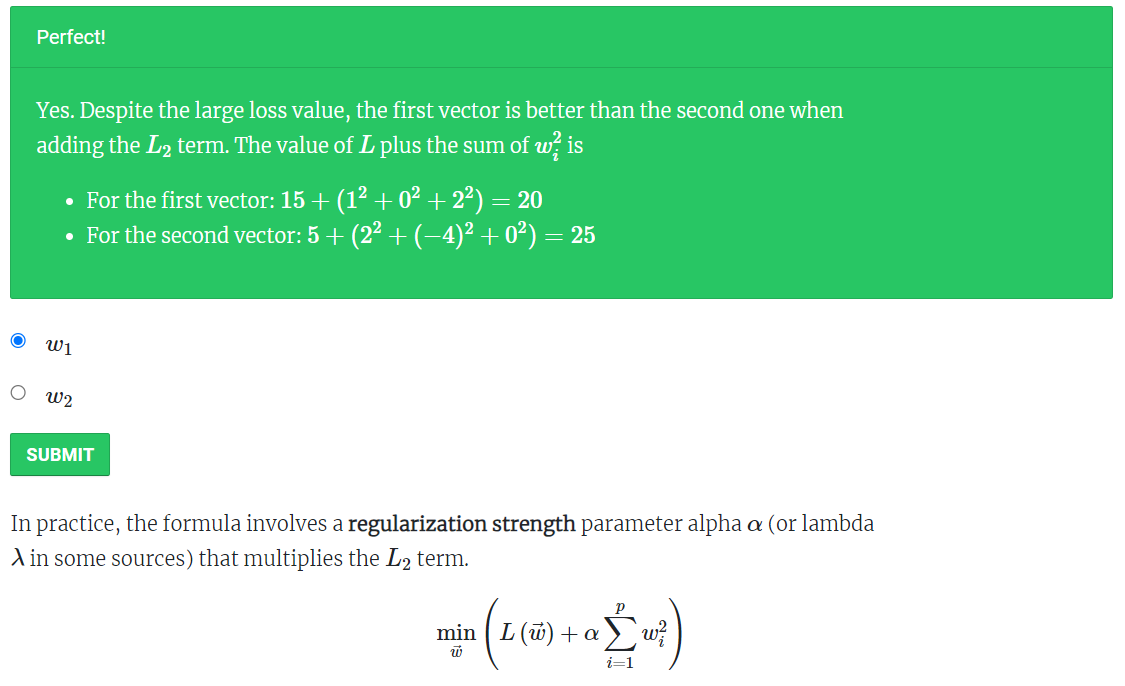

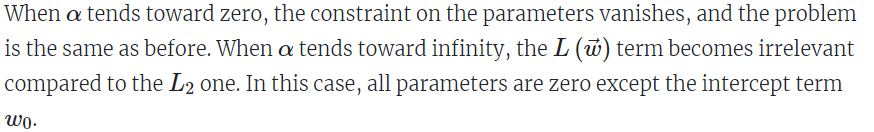

You can take a look at [this article](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) from the Scikit-learn documentation which shows the effect of the regularization strength α on the model coefficients.

### Geometrical interpretation

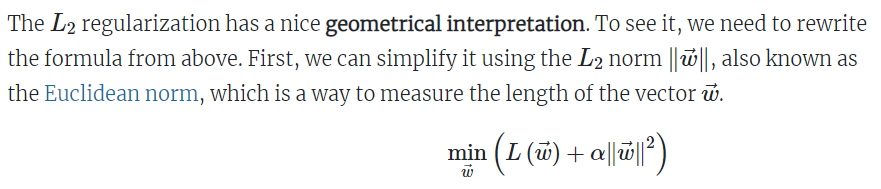

[Euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm)

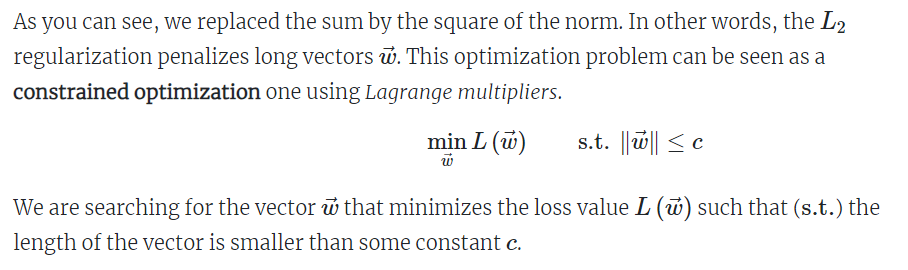

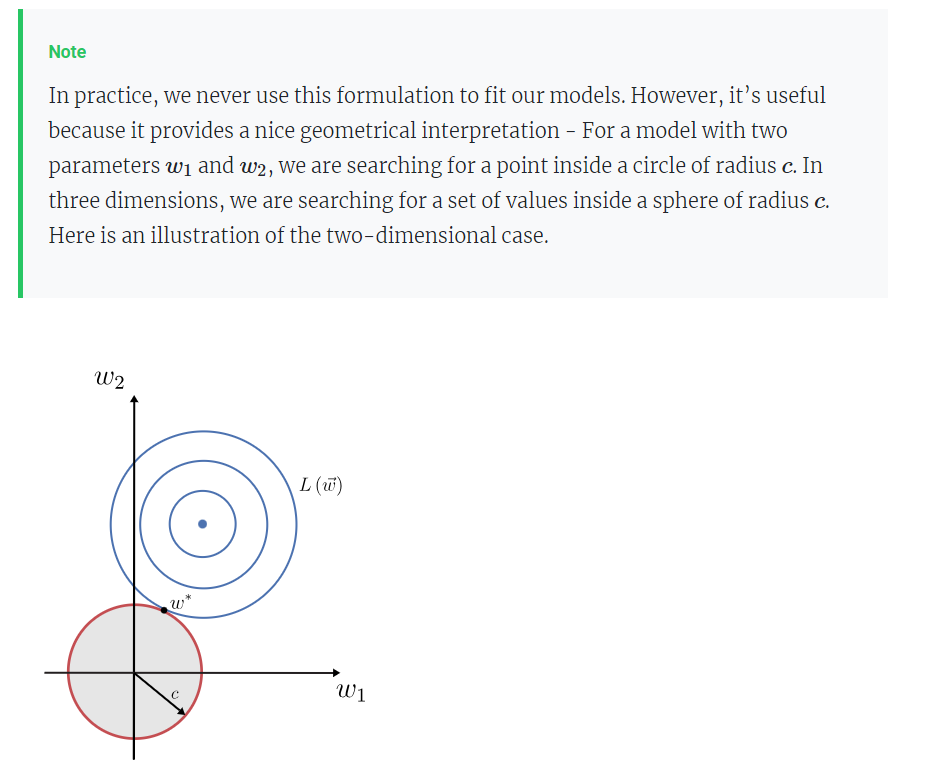

Adapted from Bishop, C. [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book) Figure 3.4

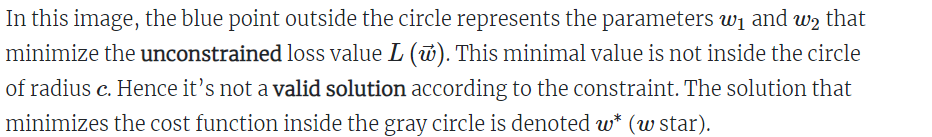

### Other regularizers

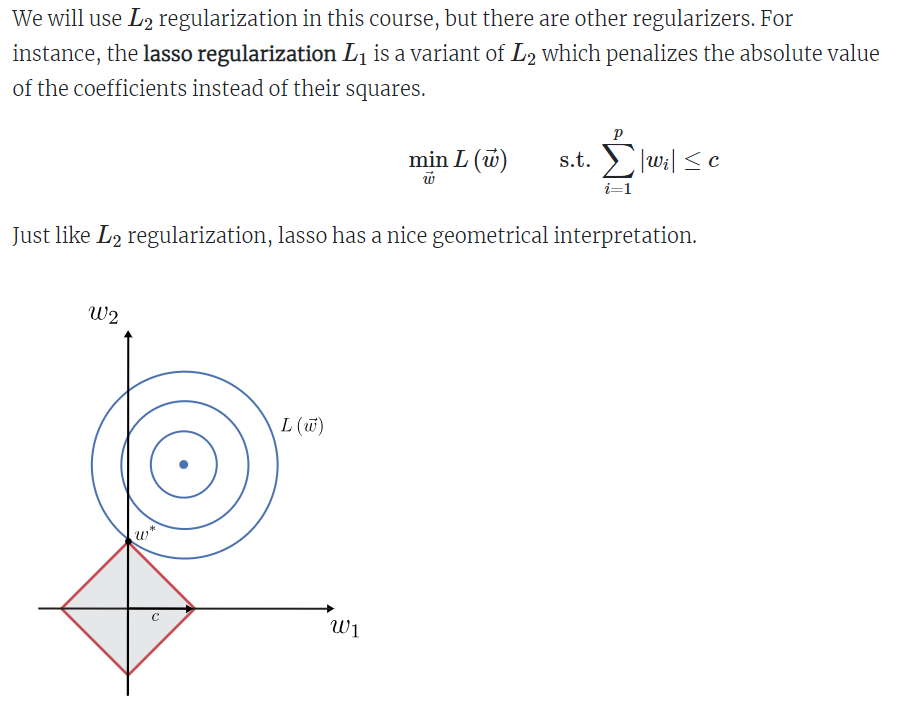

Adapted from Bishop, C. [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book) Figure 3.4

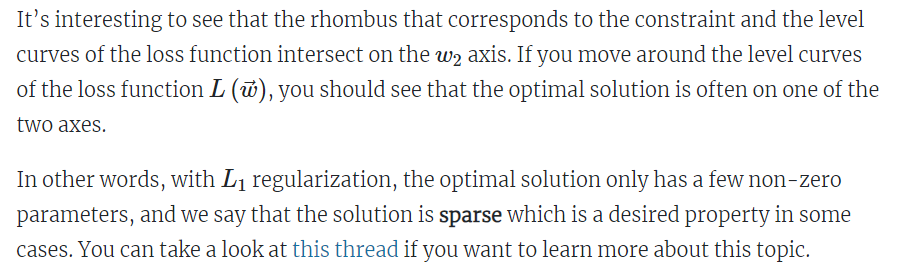

[this thread](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization-How-does-it-solve-the-problem-of-overfitting-Which-regularizer-to-use-and-when/answer/Xavier-Amatriain)

### Summary

Let’s summarize what we’ve learned in this unit. Here are a few takeaways.

- The idea behind regularization is to add a **constraint** on the amplitude of the coefficients.
- This constraint corresponds to an additional term in the cost function called the **penalization term**.
- We use an alpha α parameter to control the **regularization strength**.

In the next unit, we will implement L2 regularization for linear regressions.

## 04. Ridge regression

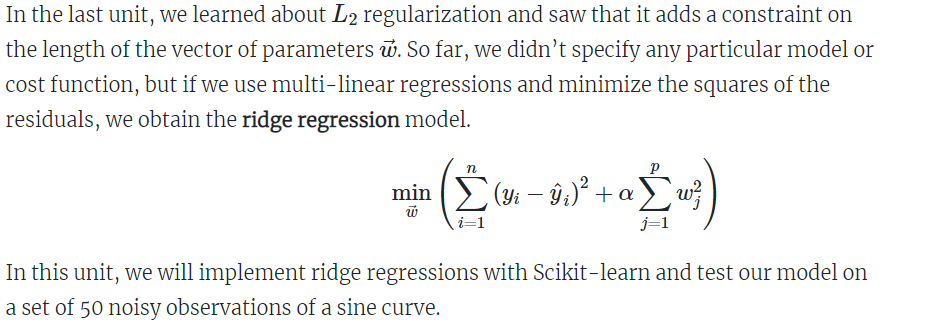

### Sine curve data set
Let’s start by loading the training data set.

In [1]:
import pandas as pd

# Load the training data
training_data = pd.read_csv("Ressources/c3_data-points.csv")

# Print shape
print("Shape:", training_data.shape)

Shape: (50, 2)


In [2]:
# First five rows
training_data.head()

,x,y
0,0.000,0.706
1,0.128,0.288
2,0.256,0.645
3,0.385,1.272
4,0.513,1.238


We generated the 50 x/y data points using a sine curve. The idea is to create 50 points on the curve and add a small noise to each point. Let’s create the x, y variables and plot the data. Note that in this unit we work only with the training set and for simplicity we use the names x, y instead of x_tr, y_tr.

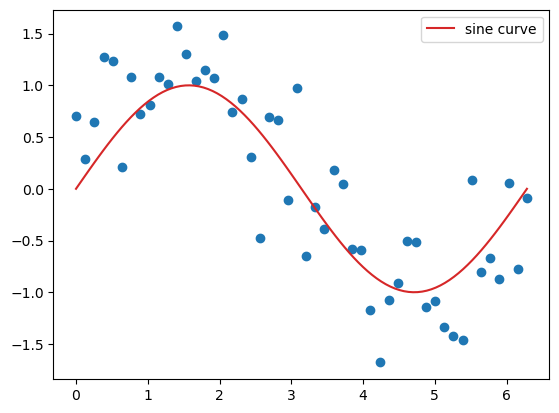

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

# Extract x, y data
x= training_data.x.values
y= training_data.y.values

# Plot data points
plt.scatter(x, y)

# Plot sine curve for reference
x_values = np.linspace(min(x), max(x), num= 100)
y_sine = np.sin(x_values)
plt.plot(x_values, y_sine, c="C3", label="sine curve")
plt.legend()
plt.show()

In this unit, we will try to **recover this sine curve** from the 50 noisy observations of it.

### Polynomial regression

Let’s fi t a polynomial regression of degree 10 to this set  of points. We can generate thepolynomial features using the PolynomialFeatures object from Scikit-learn.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial features
poly_obj=PolynomialFeatures(degree=10,include_bias=False)
X_poly=poly_obj.fit_transform(x[:,np.newaxis])

print("Shape:",X_poly.shape)
print("Features:",poly_obj.get_feature_names_out())

Shape: (50, 10)
Features: ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


Later in this unit, we will apply regularization to our models. Since regularization is sensitive to the scale of our features, we will start by standardyzing our data.

This is a common operation in machine learning, so Scikit-learn implements as StandardScaler() object to do it.  Let's see how to use to it.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X_poly)

In this code, we first have to create the object and then call its fit_transform() function to compute the mean/standard deviation of each feature (fit) and apply standardization(transform).

> **Note **: *The scaler object has also o  transform() function which does not compute the mean/standard deviation  of o feature but only applies the transformation. However, since here  we are working with the training data we should use fit_transform() function.  Later in this course we will see that in order to only apply  the standardization on the validation  and testing data we should  use the transform() function. This is because we shouldn't learn the mean/standard deviation from validation and testing data.

Let's verify that the data is standardized. The mean should be close to zero.

In [7]:
X_rescaled.mean(axis=0)

array([ 1.77635684e-16,  2.66453526e-16, -1.68753900e-16, -8.88178420e-18,
       -7.99360578e-17,  8.88178420e-18, -1.77635684e-17, -1.77635684e-17,
        4.44089210e-17,  1.06581410e-16])

And the standard deviation close to one.

In [8]:
X_rescaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Let’s now fi t a linear regression to the standardize data and plot its prediction curve.

In [9]:
from sklearn.linear_model import LinearRegression

#Linear regression 
lr = LinearRegression()
lr.fit(X_rescaled,y)

#Pass sample x values through the processing steps
X_values_rescaled = scaler.transform(poly_obj.transform(x_values[:, np.newaxis]))
y_values_lr = lr.predict(X_values_rescaled)

Note that we need to apply all the preprocessing steps to the hundred x_values used toplot the prediction curve: we fi rst create the polynomial basis with poly_obj.transform() and then standardize the features with
scaler.transform() to get the X_values_rescaled.We can then pass the results to our model to get the predictions y_values_lr. 

Here is the result.

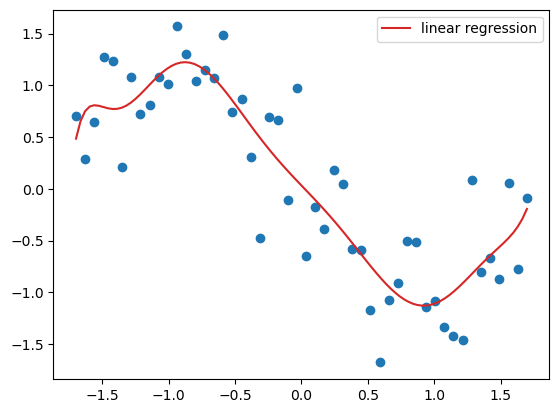

In [11]:
# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lr, c="C3", label="linear regression")
plt.legend()
plt.show()

As we can see, the model is clearly overfi tting. Let’s try to reduce overfi tting withregularization

### Ridge regression

Scikit-learn implements ridge regressions with its Ridge
object from the linear_model module. This object is an estimator which means that it implements the usual fit(), predict() and score() functions.

In [12]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge()
ridge.fit(X_rescaled, y)

# Compute predictions
y_values_ridge = ridge.predict(X_values_rescaled)

In this code, we replaced the LinearRegression object with a Ridge one. The rest of the code is the same. We get the following curve.

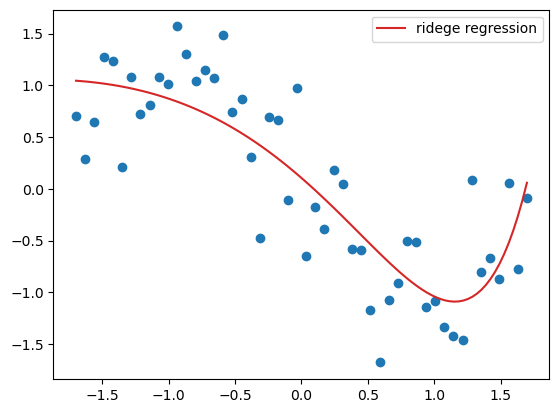

In [13]:
# Plot the model
plt.scatter(X_rescaled[:,0 ],y)
plt.plot(X_values_rescaled[:,0 ], y_values_ridge, c="C3", label="ridege regression")
plt.legend()
plt.show()

By default, the Ridge object sets the **regularization strength α** to one. In our case, the curve is too rigid to model the data points, and the model is **underfitting**.
We can decrease the constraint on the coefficients by setting a lower alpha value.

In [15]:
# Ridge regression
ridge2 = Ridge(alpha=1e-4)
ridge2.fit(X_rescaled, y)

# Compute predictions
y_values_ridge2 = ridge2.predict(X_values_rescaled)

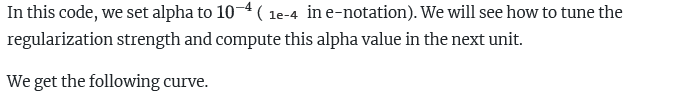

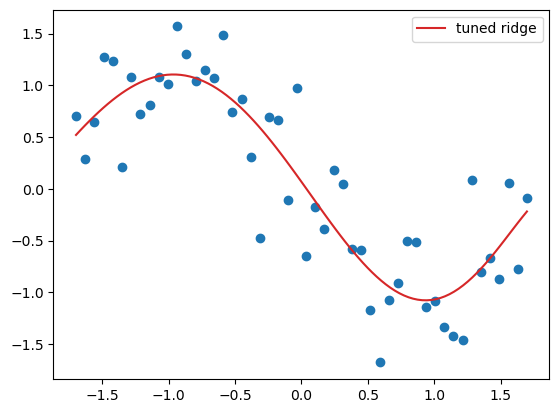

In [16]:
# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge2, c="C3", label="tuned ridge")
plt.legend()
plt.show()

We can also compare the coefficients before and after adding the regularization term using the coef_ attribute.

In [20]:
# Linear regression coefficients
features = poly_obj.get_feature_names_out()
for feature, coef in zip(features, lr.coef_):
    print("{:<6}: {:>10.1f}".format(feature, coef))

x0    :        6.3
x0^2  :     -156.5
x0^3  :     1604.8
x0^4  :    -8250.8
x0^5  :    24145.5
x0^6  :   -42951.3
x0^7  :    47245.0
x0^8  :   -31285.6
x0^9  :    11373.1
x0^10 :    -1731.0


In this code, we pair the features with their coefficient using the Python zip() built-infunction. Here are the results for our ridge2 estimator.

In [21]:
# Ridge regression coefficients
for feature, coef in zip(features, ridge2.coef_):
    print("{:<6}: {:>4.1f}".format(feature,coef))

x0    :  1.4
x0^2  : -1.6
x0^3  : -6.8
x0^4  :  3.9
x0^5  :  4.5
x0^6  :  0.5
x0^7  : -1.7
x0^8  : -1.1
x0^9  :  0.2
x0^10 :  0.1


As we can see, the coefficients are much smaller with ridge regression than with linear regression.

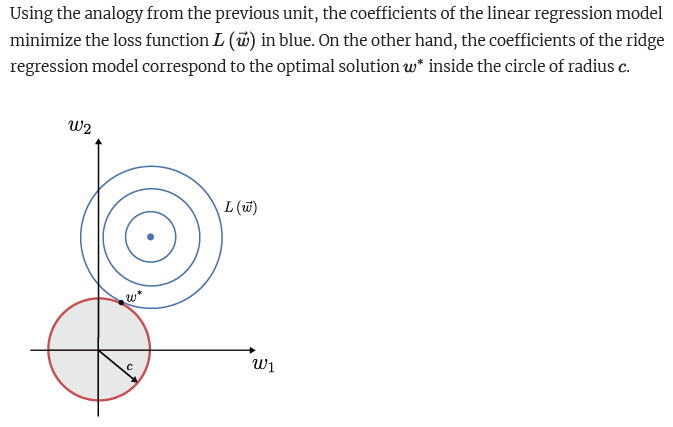

Adapted from Bishop, C.[Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book) Figure 3.4

### Lasso regressions 

One of the advantages of using Scikit-learn is that it’s easy to test different estimators. For instance, we can change the regularization to L1 using the Lasso estimator.

In [22]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso = Lasso(alpha=1e-4, max_iter=1e5)
lasso.fit(X_rescaled, y)

# Compute predictions
y_values_lasso = lasso.predict(X_values_rescaled)

In this code, we simply replaced the Ridge object by a
Lasso one. Scikit-learn uses an iterative algorithm called
**coordinate descent** to find the optimal parameters of the Lasso regression. For this reason, we need to set the number of iterations with max_iter. We will simply set it to 100k iterations. 

We get the following result.

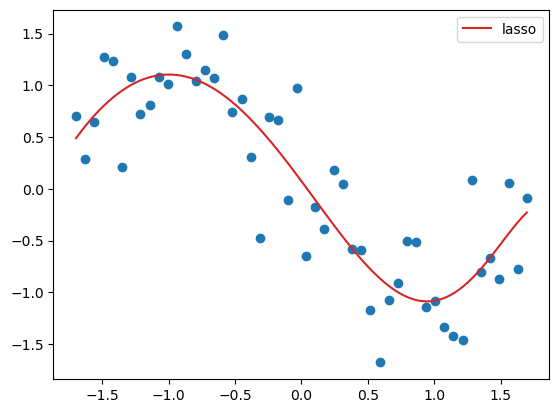

In [24]:
# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lasso, c="C3", label="lasso")
plt.legend()
plt.show()

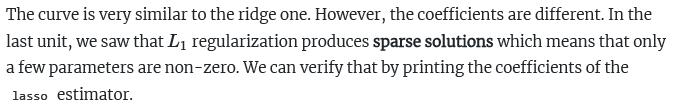

In [25]:
# Lasso regression coefficients
for feature, coef in zip(features, lasso.coef_):
    print("{:<6}: {:>4.1f}".format(feature, coef))

x0    :  1.8
x0^2  : -4.4
x0^3  : -0.2
x0^4  :  0.0
x0^5  :  2.2
x0^6  :  0.9
x0^7  :  0.0
x0^8  :  0.0
x0^9  : -0.0
x0^10 : -0.7


In this case, only six coefficients are non-zero. This is why we say that Lasso performs **feature selection** - it automatically selects a subset of the features to make predictionsand sets the others coeffi cients to zero.

### Summary
In this unit, we applied regularization to reduce overfitting of a polynomial regressionmodel. However, it can help in many other situations. For instance, we saw in a previous unit that we can use it when there is **ill-conditioning**.

In the next unit, we will see how to tune the regularization term using a simple algorithm called grid search.

## 05 Tuning hyperparameters with grid search

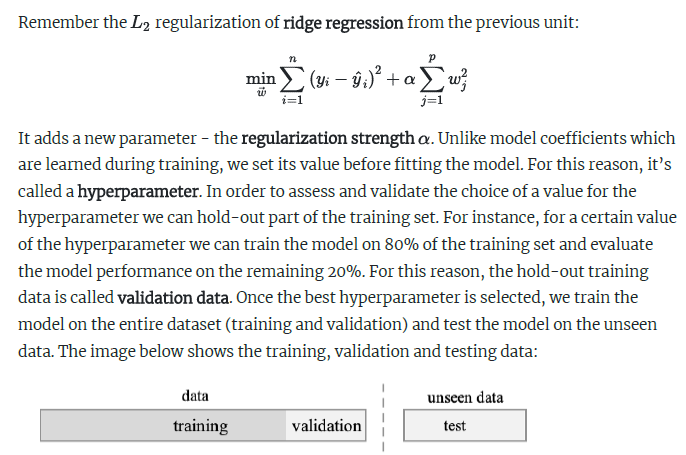

In this unit, we will see how to tune the hyperparameter using a simple technique called grid search. This time, we will work with the house prices data set.

### House prices data set

Let’s start by loading the data.



In [26]:
import pandas as pd 

# Load the data
data_df = pd.read_csv("Ressources/c3_house-prices.csv")
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


The data contains information about different house sales including the size of the house (number of rooms, lot size), the sale type/condition and the price. 

Let’s start by looking a the price.

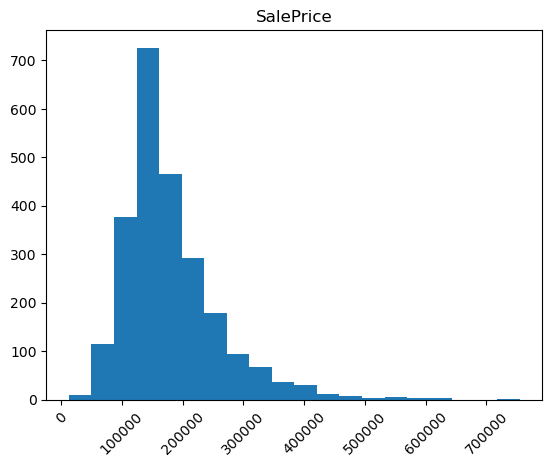

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt 

data_df.hist(column="SalePrice", bins=20, grid=False, xrot=45)
plt.show()             

Most of the houses in the data set have a price between 100 and 300 thousand dollars. However, there are a few expensive houses with prices well above that. In practice, this can lead to biased models that favor accurate predictions of expensive houses, i.e., a 10%error on a 500 thousand dollars house is equivalent to a 20% error on a 250 thousand dollars one.

To avoid building a model that is biased toward more expensive houses, we will apply thelogarithm transformation and build a model that predicts the log of the sale price.

### Preprocessing the data

As often, the raw data isn’t ready for our machine learning algorithms. In the final project, you will work on this house prices data set and apply all the necessary data cleaning. However, for this unit, we will apply the minimal steps: encoding non-numerical entries with one-hot encoding, and replacing missing entries with the median value.

Let’s create a preprocess(df) function to perform those steps.

In [28]:
def preprocess(df):
    # Work on a copy 
    df = df.copy()
    
    # One-hot encoding
    df = pd.get_dummies(df, dummy_na = True)
    
    # Fill missing values
    for c in df.columns:
        df[c] = df[c].fillna(df[c].median())
    
    return df

preprocessed_df = preprocess(data_df)
preprocessed_df.head()
    

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_VWD,Sale Type_WD,Sale Type_nan,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Sale Condition_nan
0,484,528275070,60,68.0,8795,7,5,2000,2000,0.0,...,0,1,0,0,0,0,0,1,0,0
1,2586,535305120,20,75.0,10170,6,6,1951,1951,522.0,...,0,1,0,0,0,0,0,1,0,0
2,2289,923228250,160,21.0,2001,4,5,1970,1970,80.0,...,0,1,0,0,0,0,0,1,0,0
3,142,535152150,20,70.0,10552,5,5,1959,1959,0.0,...,0,1,0,0,0,0,0,1,0,0
4,2042,903475060,190,60.0,10120,7,4,1910,1950,0.0,...,0,1,0,0,0,0,0,1,0,0


As we can see, our preprocessed_df DataFrame contains all the numerical columns on the left and created the necessary one-hot encoded columns for non-numerical variables.The total number of feature is now 347.

Before applying the model, we still need to create the X/y variables and split the data into training/validation sets.

In [38]:
from sklearn.model_selection import train_test_split

# Create X, y
X = preprocessed_df.drop("SalePrice", axis=1).values
y = np.log10(preprocessed_df.SalePrice).values

# Split into train/validation sets

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size = 0.5, random_state = 0)

print("Train:",X_tr.shape,y_tr.shape)
print("Validation:",X_val.shape,y_val.shape)

Train: (1215, 347) (1215,)
Validation: (1215, 347) (1215,)


The features have a different scale, so we also need to standardize them before applying ridge regression in the next part.

In [39]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_val_rescaled = scaler.transform(X_val)

## Linear regression

Before using ridge regression, let’s do a quick test and fit a linear regression model.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

# Try with a linear regression
lr = LinearRegression()
lr.fit(X_tr_rescaled, y_tr)

print("Train MSE: {:.4f}".format(MSE(y_tr,lr.predict(X_val_rescaled))))
print("Validation MSE: {:.4f}".format(MSE(y_val, lr.predict(X_val_rescaled))))

Train MSE: 45635658500817641537536.0000
Validation MSE: 45635658500816056090624.0000


As we can see, there is an issue with the model - the validation MSE score is extremely high. If we take a look at the model coefficients, we can see that they are extremely large.

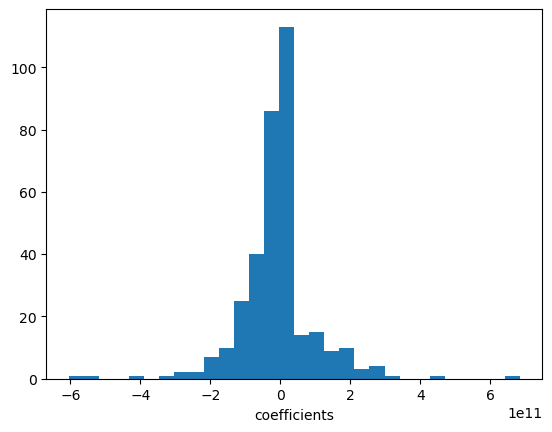

In [43]:
plt.hist(lr.coef_, bins = 30)
plt.xlabel("coefficients")
plt.show()

Note the 1e11 factor on the x-axis (!) The high validation score probably comes from numerical issues due to those large coefficients. Let’s try to fi x the issue with regularization!

### Grid search 

This time, we will search for the best regularization strength using a technique called **grid search**. You can think of this technique as a simple exhaustive searching over a set of hyperparameters.

In our case, we only have one hyperparameter: the regularization strength. So we will simply iterate over a list of alpha values and pick the one with the best validation score. However, in the next course, we will see cases where we need to tune **several hyperparameters**. In this case, we will generate a list of values for each one and evaluate the different combinations i.e. searching over a grid of hyperparams. As you can guess,the number of combinations to evaluate can quickly get very large. You will experiment with this issue in the next course, but you can already read about it in the **Appendix** at the end of this unit.

## Ridge regression

Let’s first create the list of alpha values and evaluate a ridge regression model for eachone. Regularization strength affects the generalization error on a log-scale. So we will use np.logspace(a,b) to generate sample alpha values i.e. instead of np.linspace(a,b).

It’s frequent to start with a range between a=1e-4 and b=1e4 for this hyperparameter, but we will use a larger range this time to see the effect of regularization with verylarge/small values.


In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

# Variable to store the results
gs_results = []

# Grid search 
for alpha in np.logspace(-4, 8, num=50): # for alpha between  a=1e-4 and b = 1e4 SO -4,4
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)
    
    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)), 
            "train_mae" : MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
            "validation_mse" : MSE(y_val, ridge.predict(X_val_rescaled)),
            "validation_mae" : MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
        }
    )
            

Note that we raise the predictions to power 10 for the MAE metric since we want to get a score in dollars and not log-dollars - remember that our model predicts the logarithm of the sale prices base 10.

Finally, we collect the results in a DataFrame and print the first five rows.

In [46]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,train_mse,train_mae,validation_mse,validation_mae
0,0.000100,0.001412,11145.427686,0.006007,17817.437637
1,0.000176,0.001412,11145.427755,0.006007,17817.434950
2,0.000309,0.001412,11145.427876,0.006007,17817.430228
3,0.000543,0.001412,11145.428088,0.006007,17817.421935
4,0.000954,0.001412,11145.428460,0.006007,17817.407359


### Validation curves

A good way to visualize the results is by plotting the **validation curves**. For each alpha, we plot the train and validation scores to see which value minimizes the error.

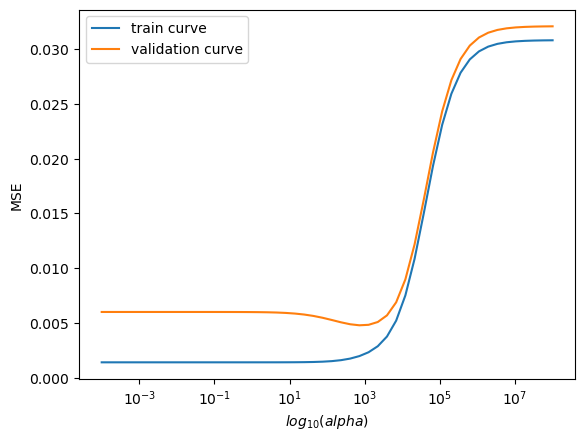

In [47]:
# Plot the validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_mse"], label="train curve")
plt.semilogx(gs_results["alpha"], gs_results["validation_mse"], label="validation curve")
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

> **Note**: There are a few things to observe about this result. 
- The **optimal** range of alpha values seems to be around 10e3, where we get th ebest validation score, i.e. the **smallest generalization error**.
- The model starts **overfitting** when alpha is smaller than 10e2 as the training score improves but we create a larger gap to the validation score.
- The models starts underfitting when alpha is larger than 10e4 as training and validation scores agree but the model performs worse than for other alpha values. 

It’s also interesting to see that the validation score reaches a plateau with alpha values above 10e6. This is the effect of regularization: when the regularization strength is too large, the model coefficient go to zero and the model always predicts the intercept term.


In [48]:
# Fit a model with a very strong regularization
strong_ridge = Ridge(alpha = 10**10)
strong_ridge.fit(X_tr_rescaled, y_tr)

print("Largest coefficient: {:.1e}".format(np.max(np.abs(strong_ridge.coef_))))
print("Intercept: {:.2f}".format(strong_ridge.intercept_))

Largest coefficient: 1.8e-08
Intercept: 5.23


Since all coefficients are close to zero, the model always predicts the intercept term - 5.23 in this case. It’s interesting to observe that this is equal to the mean - which is, as we saw in a previous unit, the constant prediction that minimizes the MSE score i.e. the mean baseline.

In [49]:
print("Mean target value: {:.2f}".format(np.mean(y_tr)))

Mean target value: 5.23


On the left part of the plot, the model also reaches a plateau which corresponds to the performance of a non-regularized model without the numerical issues that we encountered above. It’s interesting to note that a very small regularization factor can already solve those numerical issues in this case.

Let’s retrieve the alpha with the best generalization i.e. the one that minimizes the validation score.

In [50]:
# Get entry with the best validation MSE
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]

# Print the details
print("Best alpha: {:.1e}".format(best_result.alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse))
print("Validation MAE: {:,.0f}$".format(best_result.validation_mae))

Best alpha: 7.2e+02
Validation MSE: 0.0048
Validation MAE: 15,597$


As we can see, the best alpha is 8.5e+2 with an validation MSE score of 0.005. We cannot really interpret this result, so we also retrieve the corresponding MAE score - as we can see, the predictions from this model are, on average, 15,597 dollars away from the trueprice!

### Introduction to cross-validation

In the code from above, we found the best alpha value for a single train/validation split. Since the train/validation scores are evaluated on a large set of data points this result shouldn’t be too far from the true optimal alpha value. However, it could be that the split of the data was particularly (un)favourable for our model and our score. How can we be sure that our results are stable and reliable and not just a fluke?

> **Note**: It’s often a good idea to test the robustness of our model by collecting the scores on different train/validation splits and calculating the average score. This is called **cross-validation**.

There are several different cross-validation variants. We will learn more about them in the next course, but for now let’s implement our own simple cross-validation strategy with a simple for loop.

In [53]:
# Fit/validate N models

gs_results = []

for run_idx in range(10):
    #Split into train/validation sets
    X_tr, X_val, y_tr, y_val = train_test_split(
        X, y, test_size=0.5, random_state=run_idx
    )
    
    # Standardize features
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_val_rescaled = scaler.transform(X_val)
    
    # Grid search
    for alpha in np.logspace(1,4,num = 20):
        
        # Create and fit ridge regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_tr_rescaled,y_tr)
        
        # Save model and its performance on train/validation sets
        gs_results.append(
            {
                "model":ridge,
                "alpha":alpha,
                "run_idx":run_idx,
                "train_mse":MSE(y_tr,ridge.predict(X_tr_rescaled)),
                "train_mae":MAE(10**y_tr,10**ridge.predict(X_tr_rescaled)),
                "validation_mse":MSE(y_val,ridge.predict(X_val_rescaled)),
                "validation_mae":MAE(10**y_val,10**ridge.predict(X_val_rescaled)),
            }
        )
    

In this code, we perform grid search on 10 different train/validation splits by changing the random_state
attribute. For each different split, we standardize the data using the train mean and standard deviations.

The gs_results now contains 10 times more entries than if we had used a single train/validation set split.

In [54]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,model,alpha,run_idx,train_mse,train_mae,validation_mse,validation_mae
0,Ridge(alpha=10.0),10.000000,0,0.001416,11151.125598,0.005898,17485.758076
1,Ridge(alpha=14.38449888287663),14.384499,0,0.001419,11161.657456,0.005857,17372.165040
2,Ridge(alpha=20.6913808111479),20.691381,0,0.001424,11176.962177,0.005802,17233.571836
3,Ridge(alpha=29.76351441631318),29.763514,0,0.001431,11198.863815,0.005733,17067.620448
4,Ridge(alpha=42.81332398719393),42.813324,0,0.001442,11233.772529,0.005647,16871.527796


Let’s group the results by alpha value and compute the average scores.

In [55]:
# Group results by alpha value
gb_alpha =gs_results.groupby("alpha")

# Compute train/validation mean scores with std
mean_tr=gb_alpha.train_mse.mean()
mean_val=gb_alpha.validation_mse.mean()
std_tr=gb_alpha.train_mse.std()
std_val=gb_alpha.validation_mse.std()
alphas=mean_tr.index.values

# Get entry with the best mean validation MSE
best_alpha=mean_val.idxmin()
best_result=gb_alpha.get_group(best_alpha)

# Print the details
print("Best alpha: {:.1e}".format(best_alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse.mean()))
print("Validation MAE: {:,.0f}$".format(best_result.validation_mae.mean()))

Best alpha: 5.5e+02
Validation MSE: 0.0038
Validation MAE: 15,700$


This time, the best alpha value is 5.5e+02 with a mean validation MSE of 0.0038 and amean validation MAE of 15,700 dollars which is not far from the values computed above.

> **Note**: Note that we also computed the standard deviation for the different alpha values.This tells us how much the scores vary around the mean, i.e. how **robust**
our model is. We can now include this information in the plot with the validation curves.

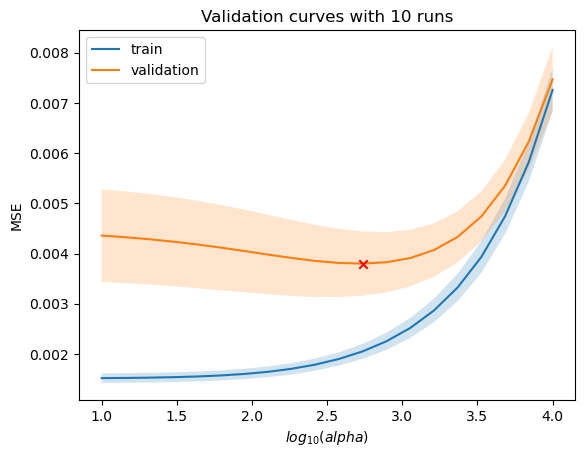

In [56]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label="train")
plt.plot(np.log10(alphas), mean_val, label="validation")

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr,
                 mean_tr + std_tr, alpha=0.2)
plt.fill_between(np.log10(alphas), mean_val-std_val,
                 mean_val + std_val, alpha=0.2)

# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_val.min(),
            marker="x", c="red", zorder=10)
plt.title("Validation curves with {} runs".format(len(gs_results.groupby("run_idx"))))
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

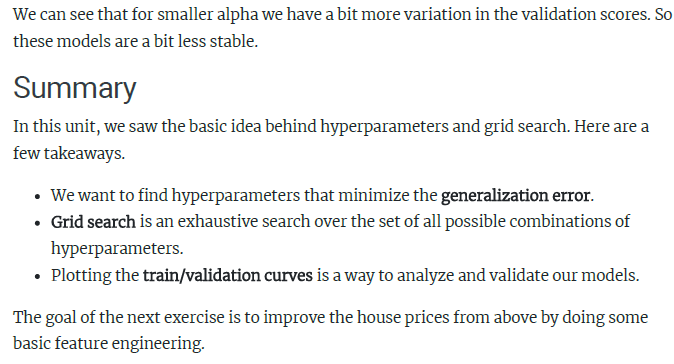

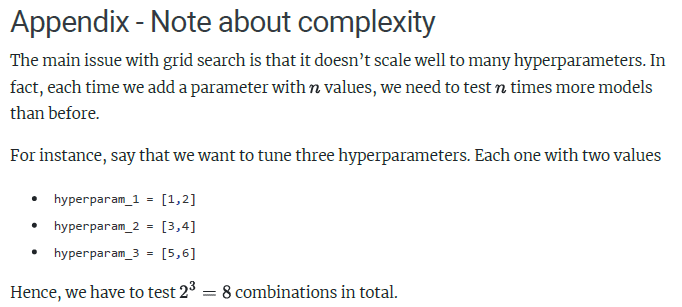

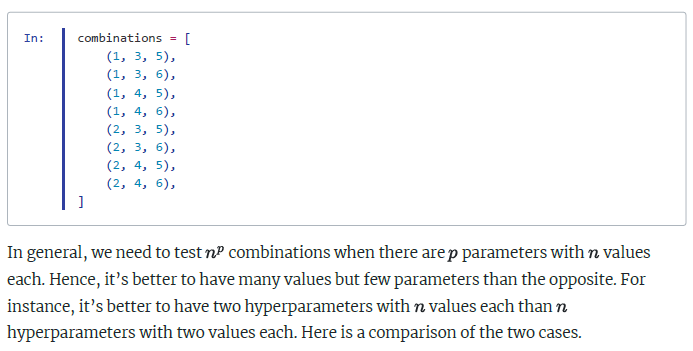

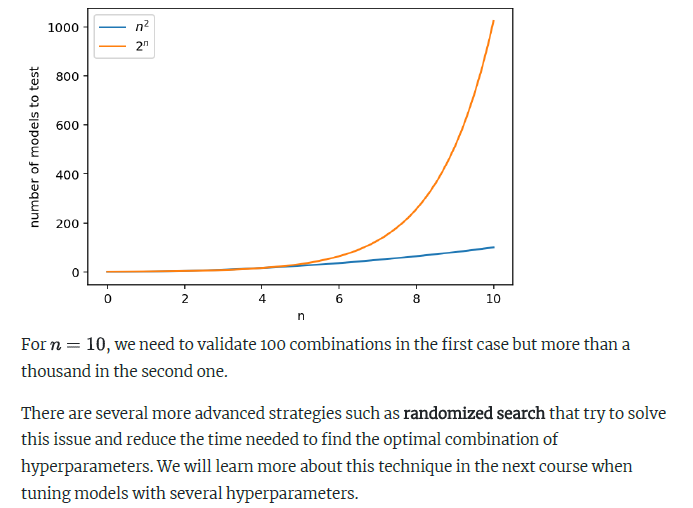

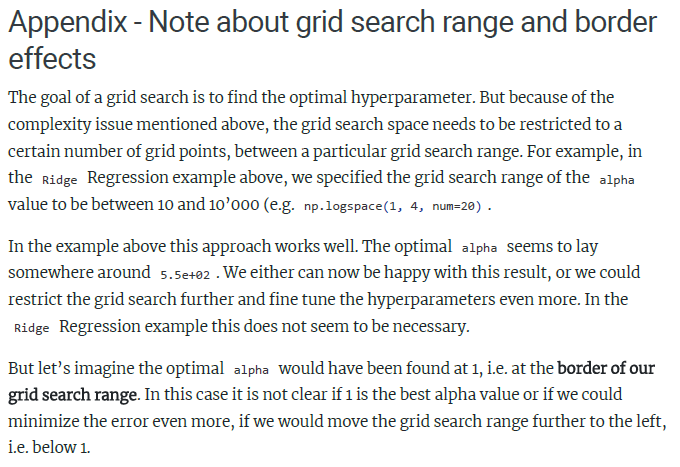

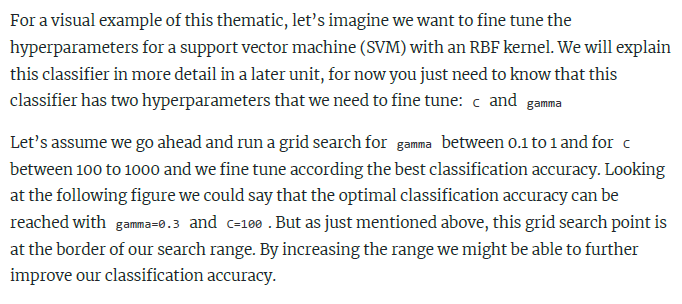

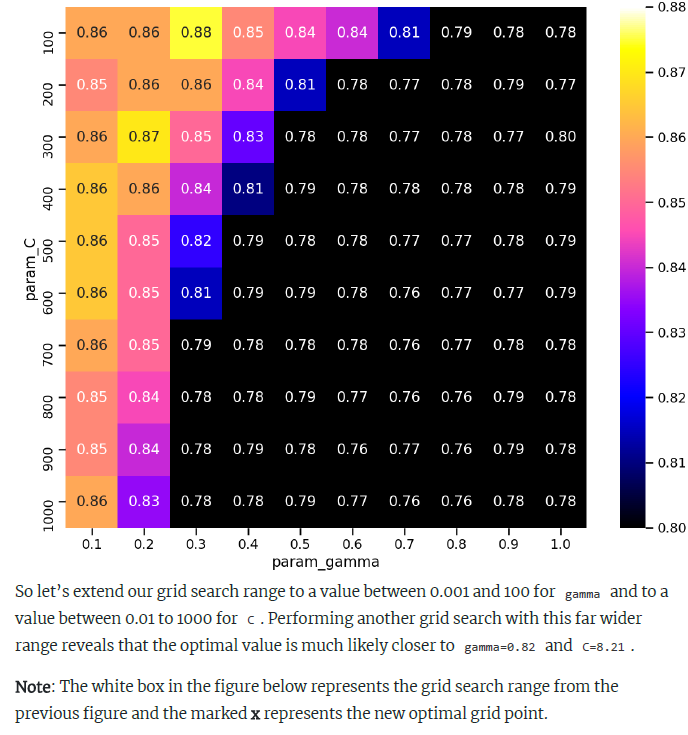

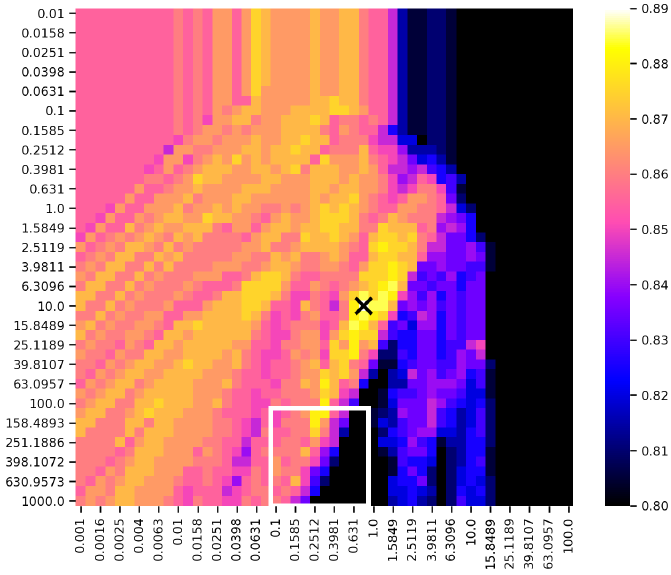



## 06 Exercise - Ridge regression

### Task description : 
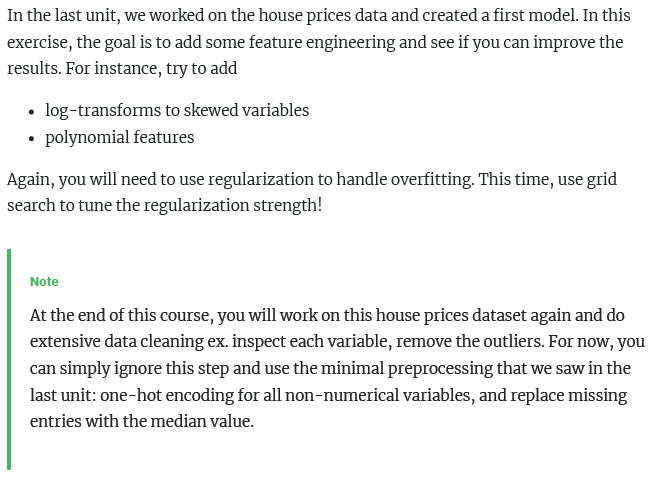

**go to** : c3_exercise_ridge_regression.ipynb 

## 08 Post-modeling analysis for regressors

As discussed in earlier units, the score on the test set gives you an estimate of the generalization error. In previous units, we encountered some common metrics for regression models such as RMSE, MAE, or R^2. However, these metrics reduce the model performance to a single number, and thus do not provide much information on how we could improve the model.

In **post-modeling analysis** we examine the errors of our models, the difference between our predictions and true values, in order to get a better understanding of the strength and weaknesses of our models. This information can then give us ideas on how to improve our model.

Seaborn provides a number of smaller data sets that you can load via the command .load_dataset(). One of these is the penguins data set which contains data on 333 penguins.

We split off 100 random samples as a test set and trained 5 different regressor models on the remaining samples to predict the feature "body_mass_g". The true body masses, the predictions of our 5 models as well as the species labels are provided in a CSV file stored in the resources tab.

> **Note** : The 5 models we used were linear regression, Huber regressor, decision tree, random forest, and a k-nearest neighbors model. You will learn more about the last three models in course 4. For now, we only care about their predictions. Finally, none of the models were fine-tuned as the purpose of this unit is not to find the best model but to analyze model performances and errors in more detail.

After loading the predictions and the packages, we will focus on how to analyze an individual model in greater detail. We will look at the distributions of the predictions and their errors and also compare them against the ground truth. In the second part, we will compare predictions from different models against each other in order to identify samples that are generally more difficult to predict.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_pred = pd.read_csv("Ressources/c3_model_predictions.csv")
df_pred.head()

,y_true,y_pred_lr,y_pred_hub,y_pred_dt,y_pred_rf,y_pred_knn,species
0,3250.0,3186.613981,3190.888090,3175.0,3195.50,3273.112286,Adelie
1,4875.0,4929.282706,4928.207019,4400.0,4872.25,4971.757801,Gentoo
2,4000.0,4061.310494,4043.939336,4250.0,4177.00,4124.402577,Adelie
3,3675.0,3519.998625,3549.329730,3950.0,3759.75,3507.845984,Chinstrap
4,4050.0,3934.843283,3910.346362,3900.0,3939.75,4001.459647,Adelie


### The analysis of individuals models 

In this section, we look at different visual analyses of a single model. We will compare the predictions of the simple linear regression y_pred_lr against the true values y_true by looking at histograms and scatterplots. Afterward, we will take a look at the prediction errors.

#### Histograms and KDE plots

We plot histograms for both the true and the predicted target values in one plot. However, it can be hard to judge whether the differences in certain places are statistically significant or not. Therefore we add the kernel density estimates (KDE) to the plot. They allow us to compare the estimated distributions of the true and predicted target values.

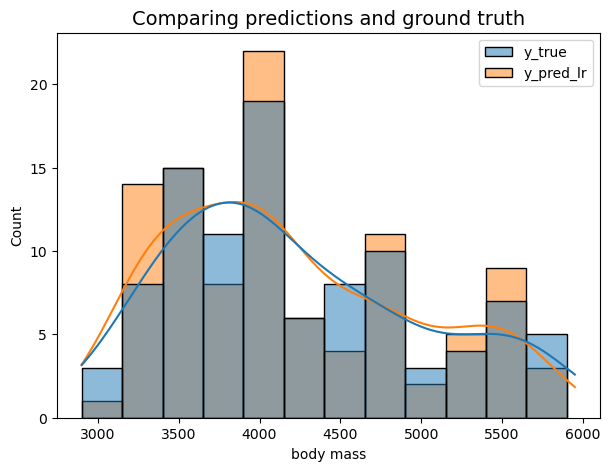

In [4]:
# Filter data
y_true = df_pred.y_true
y_pred_lr = df_pred.y_pred_lr

# Setup bins of width 250g
y_min, y_max = y_true.min(), y_true.max()
bins = np.arange(y_min, y_max, 250)

# Plot histogram
plt.figure(figsize=(7, 5))
sns.histplot(data=df_pred.loc[:, ["y_true", "y_pred_lr"]], bins=bins, kde=True)

# Add title and labels
plt.title("Comparing predictions and ground truth", fontsize=14)
plt.xlabel("body mass")
plt.show()

We can see that the two KDE are very similar, indicating that the predictions are similarly distributed to the actual values.

> **Tips and Tricks**: If we don’t have the ground truth of our test data, but would still like to compare the distributions of our predictions to real data, then we can compare the predictions against the ground truth of our training data.

#### Scatterplot
Next, let’s plot our predictions against the ground truth in a scatterplot. We add the straight line y=x in red to highlight where the perfect predictions would be located. This allows us to spot over or underestimations by the model. In this plot, we also colored the samples by "species" to check whether one species might be harder to predict than another.


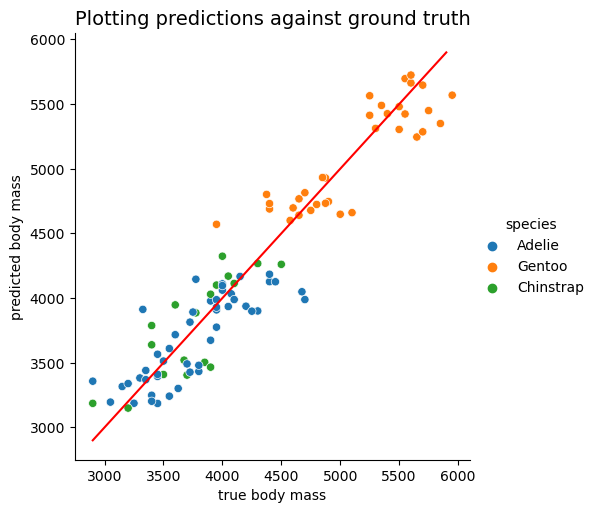

In [5]:
# Plot scatter plot
sns.relplot(x=y_true, y=y_pred_lr, hue=df_pred.species, height=5)

# Plot diagonal line
line_x = np.arange(y_min, y_max, 100)
plt.plot(line_x, line_x, c="r")

# Add title and labels
plt.title("Plotting predictions against ground truth", fontsize=14)
plt.xlabel("true body mass")
plt.ylabel("predicted body mass")
plt.show()

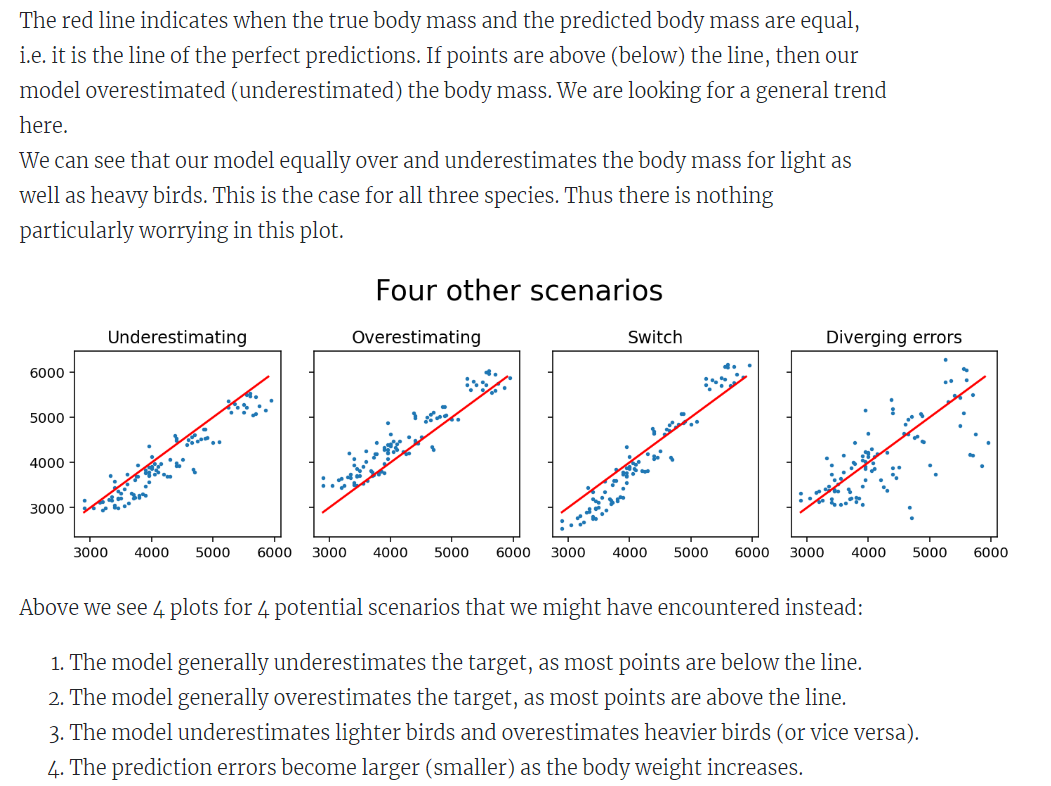

For linear models, the first three scenarios might have arisen due to outliers in the training data. The final scenario might arise if target values are skewed, and hence the target would benefit from a transformation before training models.

#### Analyzing the errors

A common assumption is that the measured values are a combination of the theoretical values and some noise and that this noise is approximately normally distributed. So let’s calculate the errors of our predictions and check their distribution.

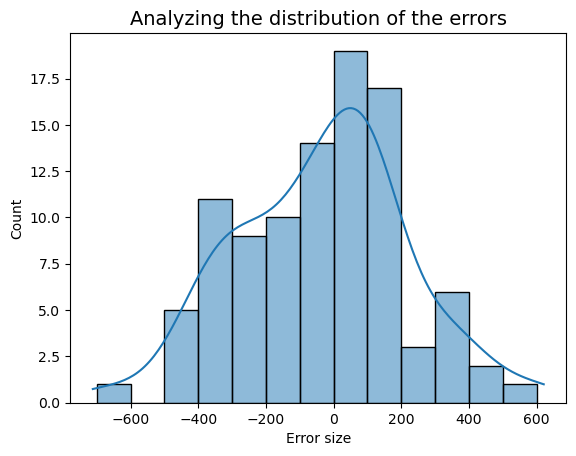

In [6]:
# Calculate errors
errors = y_pred_lr - y_true

# Plot histogram with bins of 100g
sns.histplot(x=errors, bins=np.arange(-700, 700, 100), kde=True)
plt.title("Analyzing the distribution of the errors", fontsize=14)
plt.xlabel("Error size")
plt.show()

The KDE may not look like a picture-perfect Gaussian, but it is fairly symmetric around zero and exhibits no skewness. We should also keep in mind that we are only dealing with 100 samples here.

However, the histogram can not tell us whether errors occur randomly across all body masses. We can change our perspective by plotting the errors directly against the true target.

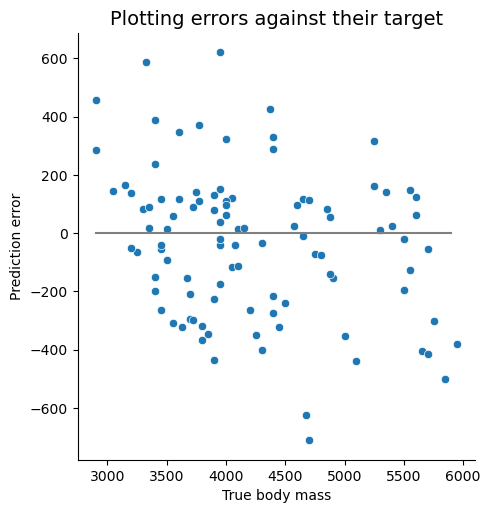

In [7]:
# Plot scatter plot
sns.relplot(x=y_true, y=errors, height=5)

# For horizontal line
y_min, y_max = y_true.min(), y_true.max()
line_x = np.arange(y_min, y_max, 100)
plt.plot(line_x, 0 * line_x, c="gray")

# Add title and labels
plt.title("Plotting errors against their target", fontsize=14)
plt.xlabel("True body mass")
plt.ylabel("Prediction error")
plt.show()

There appears to be no obvious trend. Errors may have some outliers but otherwise appear randomly distributed against the target values.

In other scenarios, we might observe that the model has a tendency to underestimate samples at the lower end of the target values while it overestimates those at the higher end. Or the absolute errors might be generally larger for higher target values.

> **Note**: We have only highlighted a few approaches for analyzing the predictions and errors of our models. Any analysis that we used in the EDA of our original data may also be considered for the post-model analysis. For example, you could look for correlations between features and errors.

#### Outliers
While we might have excluded outliers from the training set, it was important to keep outliers in the test set in order to obtain a representative estimate of the generalization error. However, once we have got that estimate, we can still look for outliers in the test set and check whether their predictions appear to have particularly high errors compared to other samples. As we don’t have the original feature values we won’t pursue this direction here.

#### Comparison of multiple models against each other
Above we have seen how to investigate individual models in more detail. Now let’s look at comparing models against each other. We start with a simple pairplot and a closer look at the KDEs again. Then we will compare the predictions of all models on individual samples and identify which samples might have been hardest to predict. And finally, we will address the most interesting question: *Which model performed best?*

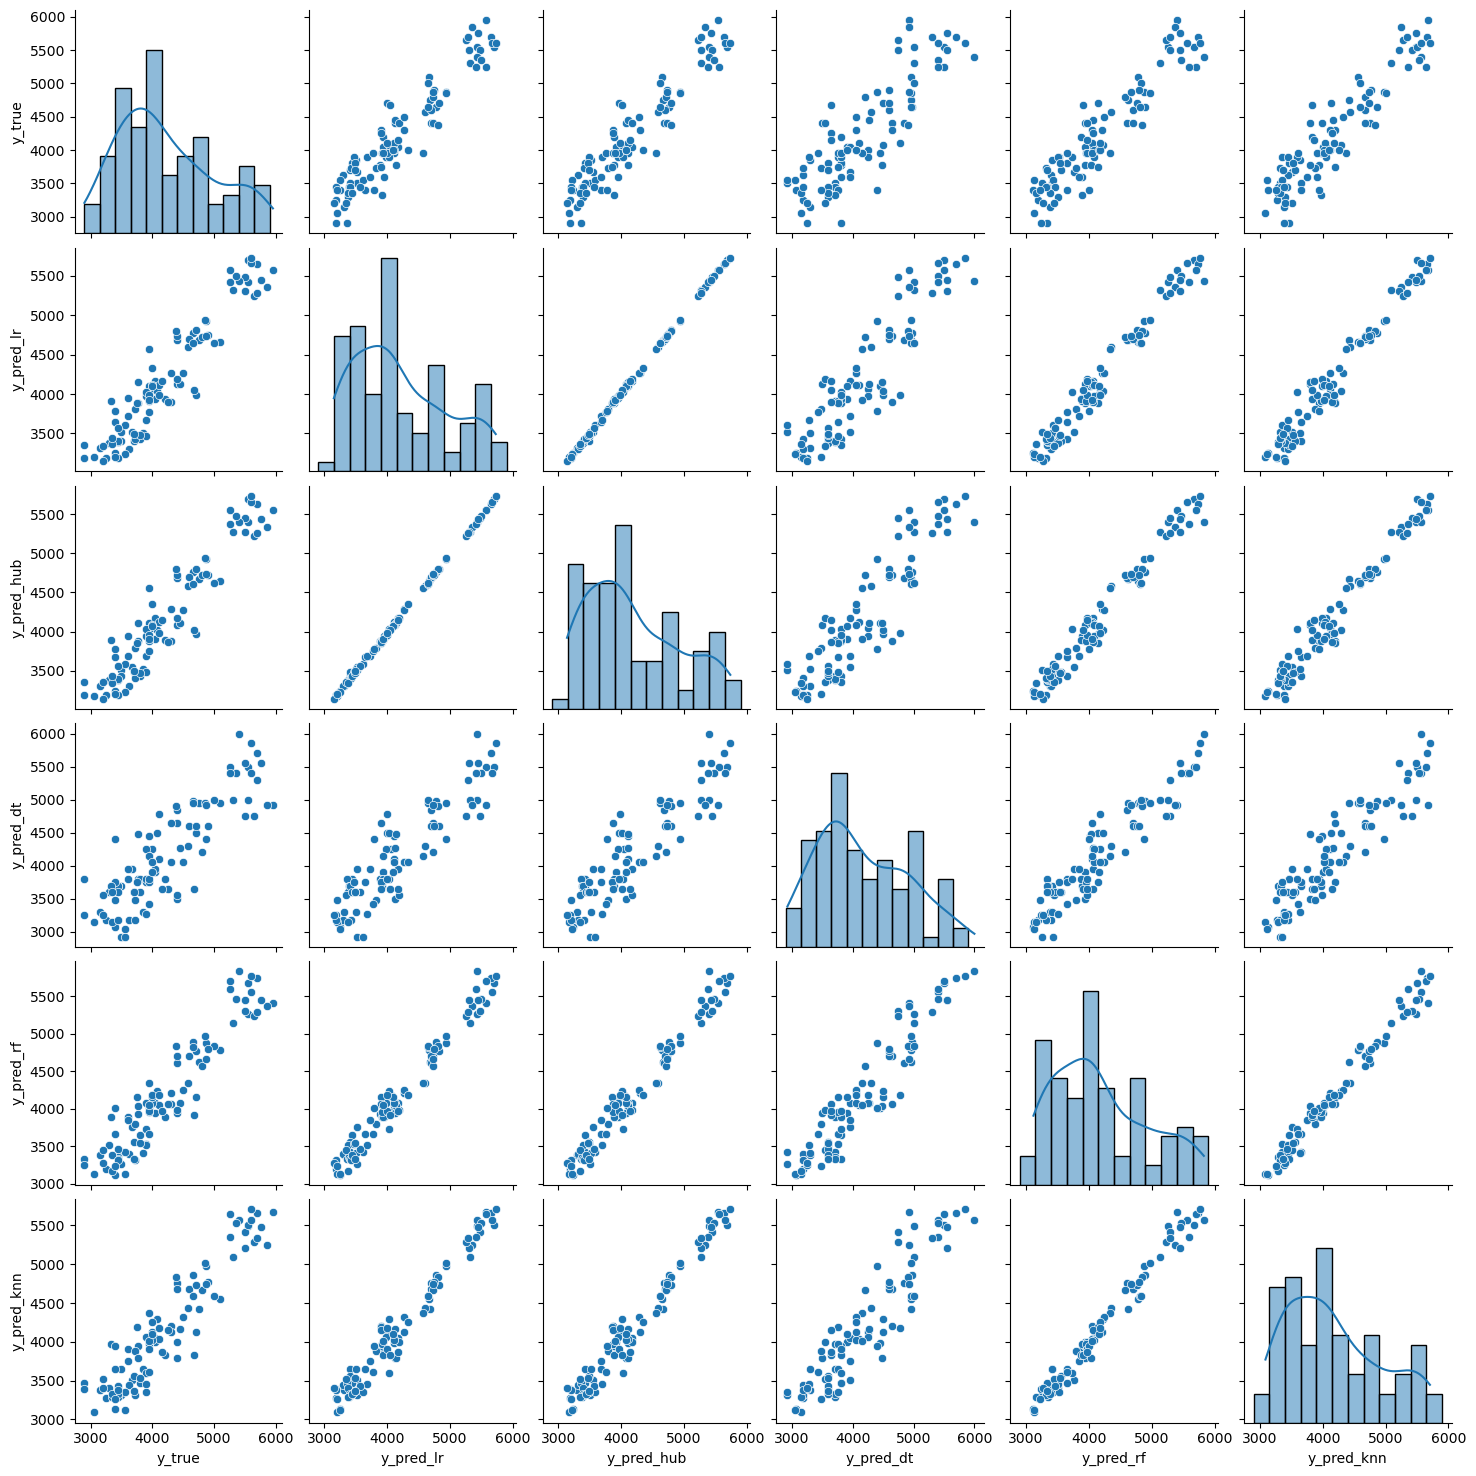

In [8]:
# Setup bins of width 250g
bins = np.arange(y_min, y_max, 250)
sns.pairplot(
    df_pred,
    diag_kws={"bins": bins, "kde": True},
)
plt.show()

At first glance, the KDEs of all our models appear to have similar shapes. Let’s investigate this more explicitly.

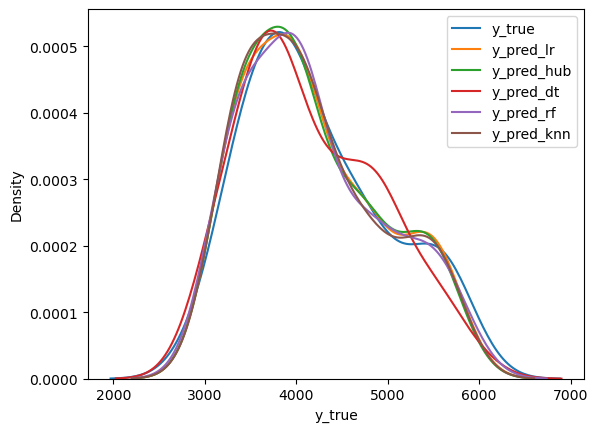

In [9]:
for c in df_pred.columns[df_pred.columns.str.contains("y_")]:
    sns.kdeplot(df_pred[c], label=c)
plt.legend()
plt.show()

Indeed, apart from the decision tree, all KDEs estimate the KDE of the true values pretty well.

Next, let’s look at the scatterplots in our pairplot. The predictions of the linear regression and the Huber regressor are in very good agreement. This is not surprising given the models are very similar. The random forest (y_pred_rf) and the k-nearest neighbors model (y_pred_knn) make quite similar predictions too, whereas the decision tree is the model that deviates most from the other models, as well as from the ground truth.

### Comparing model predictions sample by sample

In order to see whether the same samples cause problems to all the models, let’s start by plotting all our model predictions grouped by samples. For this, we first order the predictions by the size of their true value. Otherwise, the graph would become messy and hard to interpret.

In [10]:
df_pred2 = df_pred.sort_values("y_true").reset_index(drop=False)
# We retain the original index so we can easily identify the original samples whenever necessary.

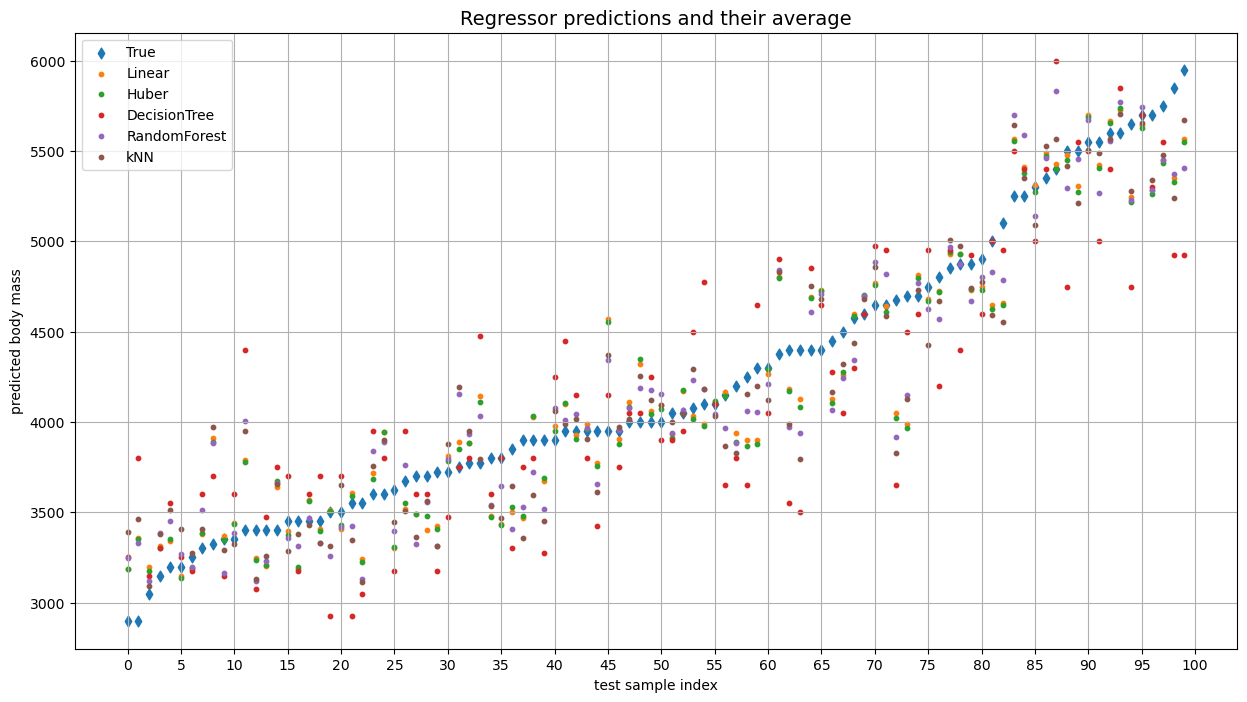

In [11]:
# Setup
plt.figure(figsize=(15, 8))
ind = df_pred.index
s = 10

# Plots
plt.scatter(ind, df_pred2.y_true, color="C0", marker="d", s=3 * s, label="True")
plt.scatter(ind, df_pred2.y_pred_lr, color="C1", s=s, label="Linear")
plt.scatter(ind, df_pred2.y_pred_hub, color="C2", s=s, label="Huber")
plt.scatter(ind, df_pred2.y_pred_dt, color="C3", s=s, label="DecisionTree")
plt.scatter(ind, df_pred2.y_pred_rf, color="C4", s=s, label="RandomForest")
plt.scatter(ind, df_pred2.y_pred_knn, color="C5", s=s, label="kNN")

# Add title, labels, etc.
plt.title("Regressor predictions and their average", fontsize=14)
plt.xlabel("test sample index")
plt.ylabel("predicted body mass")

plt.grid(True)
plt.xticks(ticks=np.arange(0, 101, 5))
plt.legend(loc="best")

plt.show()

Looking at the graph there are 5 groups of samples that may be of interest to us. Samples for which

1. all predictions are close to the ground truth and all models work fairly well for these samples
2. all predictions are far below the ground truth, i.e. all models underestimate for these samples
3. all predictions are far above the ground truth, i.e. all models overestimate for these samples
4. the predictions mostly agree
5. the predictions mostly disagree

We can also see that there are samples with very similar target values for which the predictions amongst these samples vary (samples 41-50 or 61-65)

The plot also reconfirms our earlier observation that the decision tree often gives the worst predictions and its predictions are often an outlier amongst the models. Hence we drop the decision tree for the next step and focus on the remaining 4 models that have a better performance.

Below we use the mean and the standard deviation of the predictions to identify which samples are related to the 5 groups outlined above.

In [12]:
# Selecting the 4 best models
df_best_4 = df_pred2.loc[
    :, ["y_pred_lr", "y_pred_hub", "y_pred_rf", "y_pred_knn"]
].copy()

# Calculating the prediction errors and calculating their stats per sample
df_best_4_errors = df_best_4.subtract(df_pred2.y_true, axis=0)
df_best_4_avg_errors = df_best_4_errors.mean(axis=1)
df_best_4_avg_errors.name = "avg error"
df_best_4_std_errors = df_best_4_errors.std(axis=1)
df_best_4_std_errors.name = "std error"

Now let’s have a look:

### The samples with the best average prediction

In [13]:
np.abs(df_best_4_avg_errors).sort_values().to_frame().head()

,avg error
43,4.430238
92,9.909463
71,14.755152
54,18.176192
46,21.680598


Compared to the body masses (3000-6000g) these errors are almost negligible.

### The samples with the strongest average underestimation

In [14]:
df_best_4_avg_errors.sort_values().to_frame().head()

,avg error
72,-721.508580
73,-640.974457
98,-526.396622
37,-441.309766
82,-437.330235


### The samples with the strongest average overestimation

In [15]:
df_best_4_avg_errors.sort_values(ascending=False).to_frame().head()

,avg error
8,589.645929
45,509.021195
11,480.330710
1,475.870630
61,442.219984


Using the fact that our indices are sorted by true weight, it appears overestimation may be more common for lighter birds, while underestimation might be more common for heavier birds.

### The samples with the best agreement in their predictions

In [17]:
df_best_4_std_errors.sort_values().to_frame().head()

,std error
69,9.338461
14,14.949520
97,18.366187
61,20.777373
65,22.653241


**Careful:** This tells us nothing about the accuracy of the 5 predictions. For that, we have to check the mean of the predictions. Or we can take a look at our plot.

### The samples with the worst agreement in their predictions

In [18]:
df_best_4_std_errors.sort_values(ascending=False).to_frame().head()

,std error
38,220.142656
87,196.083355
31,175.323321
33,158.690470
59,151.524435


As a next step, we could analyze what these samples have in common that makes their predictions so challenging.

- Is it due to a particular feature?
- Do the species play a role?
- Are these samples outliers or errors in the test data?
- …

The post-modeling analysis is a new cycle of EDA and we can use any of the tools we have encountered before to find ways of improving our models. But we won’t pursue this any further here.

### And the winner is?
Well, first we need to pick a metric with which we compare our models’ performance. Let’s use the RMSE, calculate it for each model, and plot the scores in a bar plot.

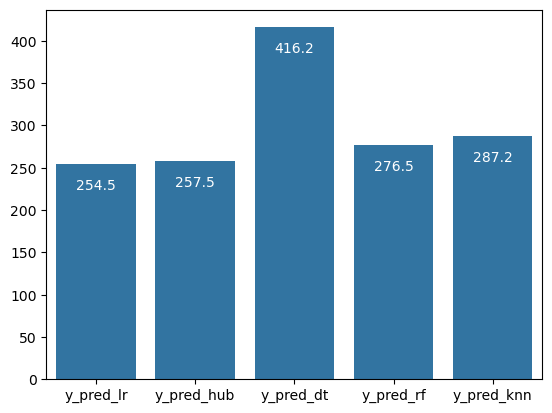

In [20]:
from sklearn.metrics import mean_squared_error

# Get the column names
trained_models = list(df_pred)[1:-1]

# Calculate the RMSE per model
rmse_list = []
for model in trained_models:
    model_rmse = mean_squared_error(df_pred["y_true"], df_pred[model], squared=False)
    # Note squared=False returns RMSE instead of MSE
    rmse_list.append(np.round(model_rmse, 1))

# The plot
sns.barplot(x=trained_models, y=rmse_list, color="C0")
# Add the RMSE values as labels to each bar
for i in range(len(rmse_list)):
    plt.text(
        x=i,  # the horizontal position, i.e. the ith bar
        y=rmse_list[i] - 30,  # the vertical position
        s=rmse_list[i],  # the text
        color="white",
        horizontalalignment="center",
    )
plt.show()

So we have reconfirmed that the decision tree was indeed the worst model and that Linear Regression and Huber Regression perform very similarly. They ultimately also came out on top in terms of overall performance.
We should keep in mind that we have not tuned our models, so maybe the default values were unfavorable for this data set. There is only one way to find out…

### Summary

In this unit, we have seen a few ways in which we can get more insight into our models’ performances. We can analyze the predictions and their errors within a single model or we can compare them across models to identify for which samples our models struggle most. Ultimately predictions are data in their own right and hence we can consider any data analysis tools encountered so far to dig deeper.

>**Warning**: Remember once we have peaked into our test set and used the insights to improve our models we will need a new test set to evaluate any future models.